In [100]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Cargar Dataset

In [101]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
ruta = 'src/athlete_events.csv'

print("Cargando dataset ...")
df = pd.read_csv(ruta)
print("Dataset cargado correctamente.")


Cargando dataset ...
Dataset cargado correctamente.


Mostrar dataset

In [102]:
print(df.head())

   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's

<h1>Quitar las columnas inecesarias</h1>

Las columnas ['ID'] y ['Name'] no nos aportan nada.

La información de la columna ['Games'] la podemos sacar de ['Year'] y ['Season'].

La información de la columna ['Event'] la reducimos a la de la columna ['Sport'] para tener menos categorías.

In [103]:
df.drop(columns=["ID", "Name", "Games", "Event", "Team"], inplace=True)
print(df.head())

  Sex   Age  Height  Weight  NOC  Year  Season       City          Sport Medal
0   M  24.0   180.0    80.0  CHN  1992  Summer  Barcelona     Basketball   NaN
1   M  23.0   170.0    60.0  CHN  2012  Summer     London           Judo   NaN
2   M  24.0     NaN     NaN  DEN  1920  Summer  Antwerpen       Football   NaN
3   M  34.0     NaN     NaN  DEN  1900  Summer      Paris     Tug-Of-War  Gold
4   F  21.0   185.0    82.0  NED  1988  Winter    Calgary  Speed Skating   NaN


<h2>Observamos el número de valores NULL por columna.</h2>

In [104]:
df.isnull().sum()

Sex            0
Age         9474
Height     60171
Weight     62875
NOC            0
Year           0
Season         0
City           0
Sport          0
Medal     231333
dtype: int64

<h2> Eliminamos los valores nulos y transformarlos </h2

In [105]:
print("Número de filas:", len(df))
df = df.dropna(subset=['Height'])
df = df.dropna(subset=['Weight'])
df = df.dropna(subset=['Age'])
print("Número de filas tras eliminar nulos:", len(df))

df['Medal'] = df['Medal'].fillna('No Medal')


Número de filas: 271116
Número de filas tras eliminar nulos: 206165


<h2> Visualizar las categorias </h2>

En la columna de Sex | Medal | Season

In [106]:
print("\nValores únicos en las siguientes columnas:")
print("['Medal'] => ", df['Medal'].unique())



Valores únicos en las siguientes columnas:
['Medal'] =>  ['No Medal' 'Bronze' 'Gold' 'Silver']


<h2> Codificación de las variables categoriques </h2>

In [107]:
from sklearn.preprocessing import LabelEncoder

le_medal = LabelEncoder()
df['Medal'] = le_medal.fit_transform(df['Medal'])

print(df['Medal'].unique())

# 2 => No Medal
# 0 => Bronze
# 1 => Silver
# 3 => Gold
# Encontrar forma de que se codifiquen en orden TODO

[2 0 1 3]


## Binarización de las columnas numéricas

In [108]:
df['Sex_Male'] = (df['Sex'] == "M").astype(int)
df['Sesion_Winter'] = (df['Season'] == "Winter").astype(int)

print(df[['Sex_Male', 'Sesion_Winter']].head())

df.drop(columns=["Sex", "Season"], inplace=True)

   Sex_Male  Sesion_Winter
0         1              0
1         1              0
4         0              1
5         0              1
6         0              1


## Realizar escalado entre 0 y 1 las siguientes columnas numéricas

#### Age | Weight | Height

In [109]:
scaler = MinMaxScaler()
df[['Age', 'Weight', 'Height']] = scaler.fit_transform(df[['Age', 'Weight', 'Height']])

print(df[['Age', 'Weight', 'Height']].head())

        Age    Weight    Height
0  0.216667  0.291005  0.535354
1  0.200000  0.185185  0.434343
4  0.166667  0.301587  0.585859
5  0.166667  0.301587  0.585859
6  0.233333  0.301587  0.585859


## ETA

In [110]:
df.head()

,Age,Height,Weight,NOC,Year,City,Sport,Medal,Sex_Male,Sesion_Winter
0,0.216667,0.535354,0.291005,CHN,1992,Barcelona,Basketball,2,1,0
1,0.200000,0.434343,0.185185,CHN,2012,London,Judo,2,1,0
4,0.166667,0.585859,0.301587,NED,1988,Calgary,Speed Skating,2,0,1
5,0.166667,0.585859,0.301587,NED,1988,Calgary,Speed Skating,2,0,1
6,0.233333,0.585859,0.301587,NED,1992,Albertville,Speed Skating,2,0,1


In [111]:
df.tail()

,Age,Height,Weight,NOC,Year,City,Sport,Medal,Sex_Male,Sesion_Winter
271111,0.300000,0.525253,0.338624,POL,1976,Innsbruck,Luge,2,1,1
271112,0.266667,0.494949,0.179894,POL,2014,Sochi,Ski Jumping,2,1,1
271113,0.266667,0.494949,0.179894,POL,2014,Sochi,Ski Jumping,2,1,1
271114,0.316667,0.585859,0.375661,POL,1998,Nagano,Bobsleigh,2,1,1
271115,0.383333,0.585859,0.375661,POL,2002,Salt Lake City,Bobsleigh,2,1,1


## GRAFICOS

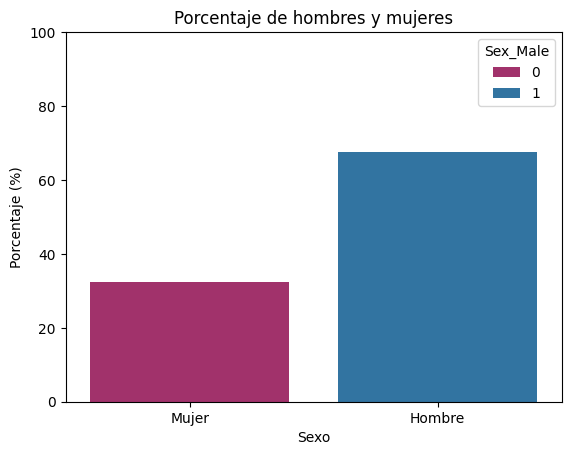

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(df, x = 'Sex_Male' , stat = 'percent', hue='Sex_Male', palette=["#b41f6c",'#1f77b4'])
plt.ylim(0, 100)
plt.xticks([0,1], ["Mujer", "Hombre"])
plt.title("Porcentaje de hombres y mujeres")
plt.ylabel("Porcentaje (%)")
plt.xlabel("Sexo")

plt.show()

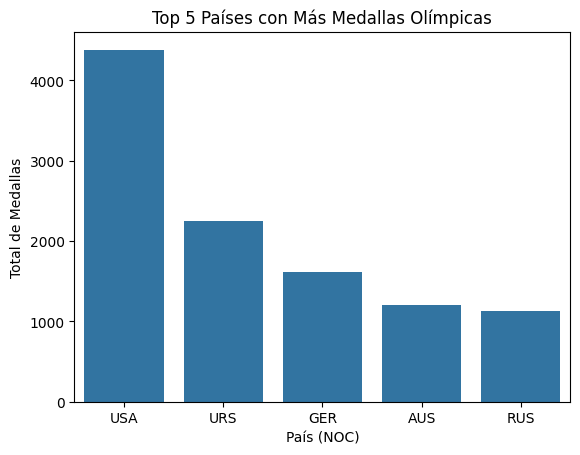

In [113]:
sns.countplot(
    data=df[df['Medal'] != 2],
    x='NOC',
    order=df[df['Medal'] != 2]['NOC'].value_counts().head(5).index
)
plt.title('Top 5 Países con Más Medallas Olímpicas')
plt.xlabel('País (NOC)')
plt.ylabel('Total de Medallas')
plt.show()


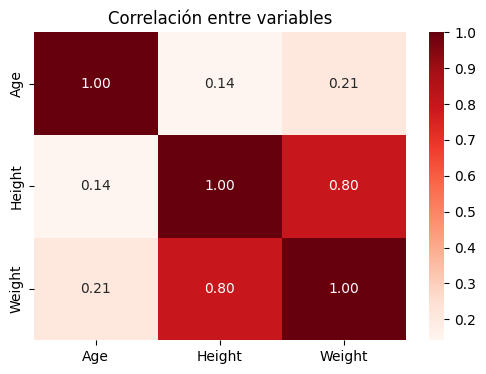

In [114]:
corr = df[['Age', 'Height', 'Weight']].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlación entre variables")
plt.show()

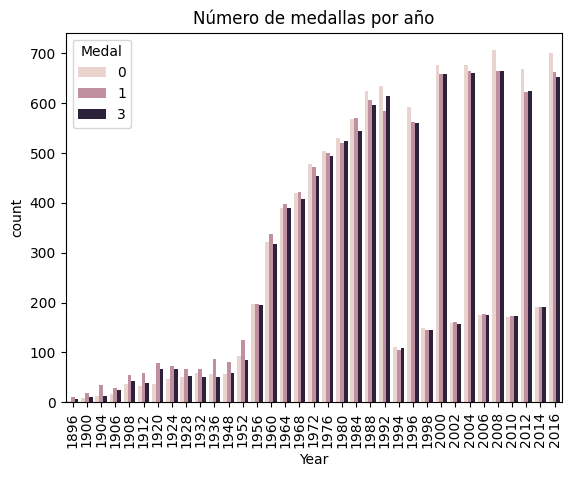

In [115]:
sns.countplot(x='Year', hue='Medal', data=df[df['Medal'] != 2])
plt.xticks(rotation=90)
plt.title("Número de medallas por año")
plt.show()


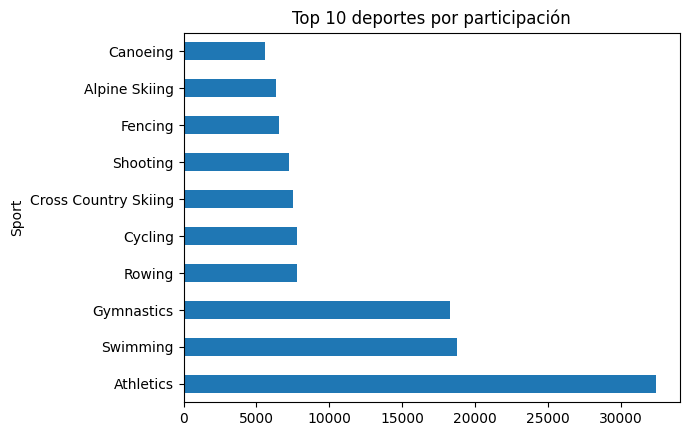

In [116]:
df['Sport'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 deportes por participación")
plt.show()


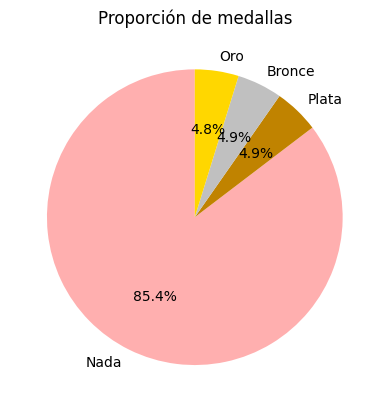

In [117]:
import matplotlib.pyplot as plt

# 2 => No Medal
# 0 => Bronze
# 1 => Silver
# 3 => Gold
# Encontrar forma de que se codifiquen en orden TODO

# Diccionario de nombres
medal_map = {0: 'Bronce', 1: 'Plata', 2: 'Nada', 3: 'Oro'}

# Contar los valores
counts = df['Medal'].value_counts()

# Graficar pie chart con etiquetas
counts.plot(
    kind='pie',
    labels=[medal_map[i] for i in counts.index],  # mapeamos los números a nombres
    autopct='%1.1f%%',
    colors=["#FFAFAF", "#C08300", 'silver', 'gold'],
    startangle=90
)

plt.title("Proporción de medallas")
plt.ylabel("")  # eliminar etiqueta del eje y
plt.show()


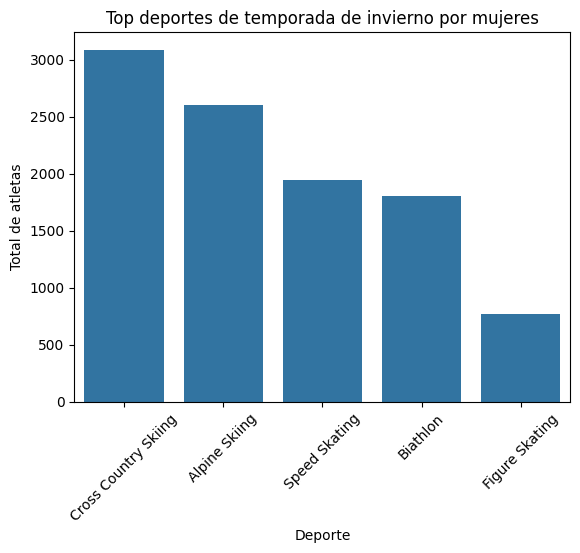

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    data=df[(df['Sesion_Winter'] == 1) & (df['Sex_Male'] == 0)],
    x='Sport',
    order=df[(df['Sesion_Winter'] == 1) & (df['Sex_Male'] == 0)]['Sport'].value_counts().head(5).index
)

plt.title('Top deportes de temporada de invierno por mujeres')
plt.xlabel('Deporte')
plt.ylabel('Total de atletas')
plt.xticks(rotation=45)
plt.show()


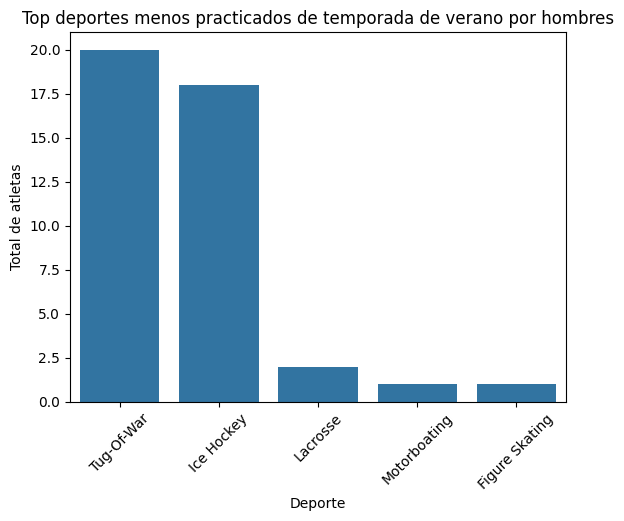

In [149]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(
    data=df[(df['Sesion_Winter'] == 0) & (df['Sex_Male'] == 1)],
    x='Sport',
    order=df[(df['Sesion_Winter'] == 0) & (df['Sex_Male'] == 1)]['Sport'].value_counts().tail(5).index
)

plt.title('Top deportes menos practicados de temporada de verano por hombres')
plt.xlabel('Deporte')
plt.ylabel('Total de atletas')
plt.xticks(rotation=45)
plt.show()